# The effect of a Universal Child Benefit - González (2013) Revisited

### A Project by Antonia Entorf & Marc Lipfert

## Overview

This notebook replicates the main results presented in the following article:   

González, L. (2013): [The Effect of a Universal Child Benefit on Conceptions, Abortions, and Early Maternal Labor Supply](https://www.aeaweb.org/articles?id=10.1257/pol.5.3.160). American Economic Journal: Economic Policy 5(3): 160–188.

In that paper, the author investigates the effect of a universal child benefit on fertility, household expenditure patterns and maternal labor supply. In particular, she is able to exploit the unanticipated introduction of a child benefit that took place in Spain in 2007 by utilising a Regression Discontinuity Design.

Apart from replicating major findings presented by González, our aim is to enrich her analysis with respect to a range different aspects. First, we will examine whether accounting for autocorrelation is necessary in the given context. Secondly, since the benefit was suspended in the aftermath of the financial crisis, we will exploit this fact and apply the identical research design to the abolishment of the policy in order to study the effect on conceptions. Thirdly, we will investigate threats to validity using simulations as well as a placebo test.




## Table of Contents

[1.) Brief Summary of the Article](#summary)

[2.) Description of the Policy and of its (potential) Effects](#policy) 

[3.) Empirical Strategy](#empirical_strategy)

[4.) Replication of Main Results](#replication)

   [4.1) Data Processing](#processing)
   
   [4.2) Regression Results and Visualization](#regression)

[5.) Critical Assesment of the Author's Empirical Work](#critique)

   [5.1) Autocorrelation](#autocorr)
   
   [5.2) Computing Month of Conception More Precisely](#mc_revised)
   
   [5.3) Global Polynomial](#global_poly)

[6.) Further Analyses](#further_analyses)

   [6.1) Heterogenous Treatment Effects](#hetero_treat)
   
   [6.2) Abolishment of the Policy](#abolishment)
   
   [6.3) General Reliability (Placebo Test & Simulation)](#general_reliability)
   

[7.) Conclusion](#conclusion)

[References](#references)

[Appendix](#appendix)

<a id='policy'></a>
## 1.) Description of the Policy and of its (potential) Effects 

On July 3 in 2007, the Spanish government announced the introduction of a universal child benefit. Mothers giving birth from July 1, 2007 onwards were eligible to receive a one-time cash payment of 2,500€. Libertad González, henceforth LG, analyzes the effect of this child benefit on the number of conceptions and abortions as well as on household expenditures, maternal labor supply and day care use. She uses a sharp regression discontinuity design (RDD) for her analysis, where the running variable is time and the treatment variable is equal to 1 after July 1, 2007 and 0 before that date.

A problem which could hypothetically occur when using a RDD is self selection into treatment. In this particular setting one could imagine that women try to postpone birth in order to give birth after the cutoff date and not before. This scenario seems especially plausible for low income families who are in greater need of the cash payment. Therefore, the mothers giving birth right before and rigth after the cutoff could differ in personal characteristics, such as income and education. This could lead to a bias in the estimated average treatment effect if low income families react differently to receiving treatment compared to high income families and, additionally, we are not able to control for these personal characteristics.

However, self slection into treatment was not possible in our setting, because the introduction of the policy was unexpected and the announcement was even two days after the actual cutoff date. These two aspects rule out the possiblity to postpone birth in order to receive the benefit.

#### Effects on Fertility

<img src="causal-graphs/causal-graph-fertility.png" width="600" />

The causal graph above represents two regression analyses of the article. First, LG is interested in the effect of the introduction of the child benefit on the number of conceptions per month and, second, on the number of abortions per month. Thus, the treatment variable, D, is the introduction of the child benefit and the dependent variables (Y1 & Y2) are number of conceptions and number of abortions per month. In this graph the treatment should be interpreted as having the possibility to get the benefit and not as already having the benefit.

The running variable, time, determines assignment to treatment and, furthermore, influences conceptions and abortions through seasonality effects. The treatment variable is supposed to influence conceptions and abortions, which both determine the number of births. Furthermore, the number of abortions is influenced by the number of conceptions.

One could expect that the number of conceptions increases after the introduction because the promise of receiving a cash payment increases families' incentives to get a child. The same reasoning can be applied to the number of abortions. Treated women have more incentives to reject an abortion than untreated women. Therefore, the introduction of the benefit should reduce the number of abortions.

Obviously, 2,500€ is rather few compared to the costs associated with a child. Thus, a pontential impact of the treatment on the outcome variables should be small.

*We could think about whether rather low educated families aim for the cash payment not only due to probably lower income but also because they underestimate the costs associated with a child!*

Important is that we actually do not observe the number of *conceptions* per month but only the number of *births* per month. LG's idea was then to calculate the month of conception based on the month of birth by subtracting the approximate number of months a woman was pregnant.

However, birth is a collider variable mutually depending on conceptions and abortions. Thus, when calculating conceptions while ignoring abortions our results might not be accurate. To illustrate this, imagine that the treatment does not at all affect the number of conceptions. However, at the same time many treated women decide to not having an abortion while their untreated counterfactual would have decided to have an abortion. Thus, the treatment causes a reduction in the number of abortions which, clearly, leads to an increase in the number of births. If we then calculate conceptions based on births it would look like an increase in the number of conceptions, although it was unchanged.

Therefore, we must bear in mind that a change in the conceptions variable can be partly driven by a change in the abortions variable! The author also mentions this dependence of the conceptions variable on abortions.

Considering the back-door path criterion for identification, we see that there is the path over time, T, to both depending variables. Therefore, it is necessary to condition on T to block the back door path which is done by the author.

For the regession of Y2 on D, there is a second back door path over Y1. This path is not blocked. The same holds true for Y1 on D due to the way conceptions are computed using information about births which depend on abortions.

#### Effects on Economic Variables

<img src="causal-graphs/causal-graph-economic-variables.png" width="600" />

The second causal graph represents the remaining three regression analyses of the article. This time the dependent variables are household expenditures, maternal labor supply, and child care use.

There is slight different in the interpretation of the treatment variable, D, compared to the first causal graph. This time, D should be interpreted as already having received the cash payment because LG compares families *having* children shortly before and after the cut-off date.

<a id='empirical_strategy'></a>
## 2.) Empirical Strategy

To illustrate the empirical strategy and its potential pitfalls, we make use of the potential outcomes framework first proposed by Rubin (1974). Notation is borrow from the textbooks by Morgan and Winship (2015) as well as Frölich and Sperlich (2019).

The research question by González (2013) can be condensed as follows: she aims at quantifying the impact of the introduction of a universal child benefit on a range of outcome variables. Her study therefore constitutes a classical policy evaluation, i.e. an ex-post investigation in which the researcher seeks to obtain empirical evidence on the causal effect of a policy measure. The challenge, however, is that the outcome variables are typically affected by many other factors - otherwise one could simply conduct a before-after comparison. Therefore, the causal effect has to be disentangled from the influence of those confounding factors.

More formally, in the given setting there is a binary variable $D$ indicating treatment ("receiving the child benefit"). Also, let $Y^d$ denote the potential outcome for treatment status $D = d$. Thus, $Y^1$ refers to the potential outcome with exposure to treatment and $Y^0$ to the potential outcome without treatment. The difference between them, $Y^1 - Y^0$, gives the causal eﬀect of the intervention. Naturally, both cannot be observed at the same time since treatment status is either $D = 1$ or $D = 0$.  The observed outcome $Y$ is given by: <a id='eq1'></a>

\begin{align*}
\text{(1)} \qquad Y = (1 - D) \cdot Y^0 + D \cdot Y^1   \text{ with } D \in \{0,1\}.
\end{align*}

Further, the treatment status is determined by a variable $Z$ ("running variable"), which is time in the given context: only mothers giving birth after a specified cut-off date $z_0$, i.e. July 1 2007, were eligible to claim the benefit. González (2013) provides several reasons why the treatment status can be viewed as being deterministically dependent on the running variable time, i.e. practically all eligible mothers actually received the benefit. Importantly, administrative barriers were very low and merely entailed completing a one-page form. In 2008, the Spanish tax authorities reported paying out 491,557 child benefits which corresponds to 95% of the total number of births in that year (including ineligible mothers, i.e. those not having resided legally in Spain for at least two years before giving birth). Thus, treatment assignment can be formalised as follows: <a id='eq2'></a>

\begin{align*}
\text{(2)} \qquad  D = \boldsymbol{1} \{Z \geq z_{0} \}.
\end{align*}

Taken together, such a setup lends itself to a sharp Regression Discontinuity Design (RDD). This identiﬁcation strategy, first introduced and applied by Thistlethwaite and Campbell (1960), exploits the discontinuous change in $D$ that occurs when the running variable $Z$ reaches the known threshold value $z_0$. Then, under certain conditions,  changes in the observed outcome $Y$ at the cut-oﬀ value $z_0$ can be ascribed to the alteration of the treatment status. Note, however, that this only allows causal inference at or around the threshold value, that is, a Local Average Treatment Effect (LATE) is retrieved. The evidence obtained regarding those local behaviour changes can ususally not be generalised.

A Regression Discontinuity Design is typically applied to cross-sectional data - and with many observations close to the cut-off value $z_0$, it allows to infer the causal effect without extensive paramentric assumptions by simply comparing actual outcomes just below and right above the threshold. In such a convenient cross-sectional setting, clean identification is achieved even without conditioning on control variables. Hahn et. al. (2001) formalise this approach which, in our notation, reads as follows: <a id='eq3'></a>

\begin{align*}
\text{(3)} \qquad E[Y^{1}-Y^{0} | Z=z_{0}] = \lim_{\varepsilon \to 0} E[Y|Z=z_{0}+\varepsilon]-\lim_{\varepsilon \to 0} E[Y|Z=z_{0}-\varepsilon].
\end{align*}

The only assumption necessary, in the cross-sectional case as well as when dealing with time series data, is that potential outcomes evolve smoothly around the cut-off value: if $Y^1$ or $Y^0$ were exhibiting a jump at the threshold anyway, it would not be possible to extract the causal impact of treatment which would render the whole method inapplicable. Following Lee and Lemieux (2010), this assumption is commonly violated when individuals can manipulate their value of $Z$ and intend to sort into or out of treatment. Formally, drawing again on Hahn et. al. (2001), the crucial identifying assumption (A) can be stated as follows: <a id='A'></a>

\begin{align*}
\text{(A)} \qquad E[Y^{d}|Z=z] \text{ continuous in } z \text{ around } z_{0} \text{ for } d \in \{0,1\}.
\end{align*}

Coming back to the actual setting, there are upsides and downsides. First, time as running variable and the particular features of time series data pose certain problematic issues. Secondly, sorting around the threshold can be ruled out in the matter at hand, but still smoothness of the potential outcomes cannot be claimed without further ado. Both aspects shall be discussed in the following.

With regard to the fist point, it would be more precise to refer to the employed research design as Regression Discontinuity in Time (RDiT). Its corresponding pitfalls and the conceptual differences compared to the classical cross-sectional RDD are emphasised by Hausman and Rapson (2018).  For a start, once pure time series data is considered, the only way to reach an appropriate degree of statistical power is to expand the time frame. While in cross-sectional applications precision can, in principle, be increased by increasing the number of observations within a given bandwidth around the threshold, pure time series data has by definition only one observation per discrete point in time. This is for example the case when González (2013) analyses the effect on conceptions - there she only has monthly sums available. However, drawing on observations further away from the cutoff-date constitutes a major departure from the cross-sectional approach described above. In particular, the method becomes more vulnerable to bias from unobserved confouding variables.

Further, an inherent issue when dealing with time series data is that the error terms are likely to exhibit serial correlation. There are different solution approaches to address this problem, one of them would be the use of clustered standard errors. Alternatively, heteroscedasticity and autocorrelation robust estimation techniques can be employed, such as the one proposed by Newey and West (1987). Since González (2013) does not explicitly refer to this problem in her article, we will take up this issue later on. 

Regarding the second point, the setup in Spain is particularly suitable for applying a RDiT since anticipation effects and corresponding sorting around the threshold are ruled out. According to González (2013), the policy was unexpectedly announced on July 03 2007 and the eligibility cut-off date was subsequently moved to July 01 2007. Therefore, sorting into treatment is rendered practically impossible. Interestingly, González together with coauthors investigates such anticipation effects with respect to the abolishment of the Spanish child benefit that occurred in the course of the financial crisis. Their paper will be picked up on later on.

Still, concerns that the key identification assumption, i.e. smoothness of potential outcomes around the threshold, is violated are not overcome just by ruling out sorting around the threshold. The focus is therefore on other factors discontinuously affecting potential outcomes during the period under consideration. González (2013) argues that "no  other  policy  changes  in  2007  or  thereafter  applied  differentially  to  children  born  before  and  after July 1, 2007" - a claim that we can neither verify nor falsify. 

Apart from discontinuous policy changes, major concerns relate to seasonality effects and the overall time trend. While in the cleanest cross-sectional RDD one can retrieve an unbiased estimate of the causal effect without conditioning on control variables, those are needed in a RDiT setting to prevent bias. Clearly, controlling for the number of days of the month when considering monthly conceptions or abortions appears to be reasonable. Furthermore, it has to be accounted for the overall time trend as well as for monthly patterns if possible. 

Turing towards the regression equations that are actually estimated by the author, first consider the specification without calender month dummies: <a id='eq4'></a>

\begin{align*}
\text{(4)} \qquad Y_m = \alpha + \theta \cdot m + \delta (m \cdot D) + \beta \cdot D + \lambda \cdot X_m + \epsilon_m.
\end{align*}

This is applied to (the natural logarithm of) the number of conceptions (and subsequently also to the number of arbortions) in month $m$, in form of the dependent variable $Y_m$. The treatment effect is given by $\beta$ which is the coefficient of an indicator variable $D$ taking value 1 beginning in July 2007, the month when the policy was adopted. $X_m$ denotes the number of calender days of the respective month. As can be seen in the equation, the running variable time, in form of month $m$ which is normalized to zero at the threshold (July 2007), is included as regressor such that a linear time trend is estimated that is allowed to differ pre/post treatment, which is captured by the interaction term $(m \cdot D)$. Note that in specifications with longer time frames, the author also employs higher order polynomial time trends, while in the shortest specification (3 months pre/post-treatment) only $X_m$ but no time trend is included as regressor.

Longer time frames allow to control even more precisely for seasonal patterns because then calender month fixed effects can be estimated by adding respective dummy variables to the regression equation. That is why the authors also applies the following regression equation to the same two dependet variables conceptions and abortions: <a id='eq5'></a>

\begin{align*}
\text{(5)} \qquad Y_m = \alpha + \theta \cdot m + \delta (m \cdot D) + \beta \cdot D + \lambda \cdot X_m + \sum_{c=2}^{12} \mu_c \cdot month_m + \epsilon_m.
\end{align*}

Lastly, González (2013) also has cross-sectional survey data available allowing her to apply the research design with respect to the labor supply decision of the mother as well as to different kinds of household expenditures and the use of day care as dependent variables. Therefore, she estimates the following regression equation: <a id='eq6'></a>

\begin{align*}
\text{(6)} \qquad Y_{im} = \alpha + \theta \cdot m + \delta (m \cdot D) + \beta \cdot D + \Pi \cdot \mathbf{X}^T_{im} + \epsilon_{im}.
\end{align*}

This specification is quite similar to equation [(4)](#eq4) but now a subscript $i$ denoting the individual household is added such that, for example, the row vector $\mathbf{X}_{im}$ comprises control variables like educational attainment of mother and father for household $i$ with their child being born in month $m$, where the running variable is, as always, normalized with zero at July 2007.

<a id='replication'></a>
## 3.) Replication of Main Results

<a id='processing'></a>
### 4.1) Data Processing
Before we can start with the data analysis we need to prepare the data sets. Therefore we translate the author's Stata code into python code. There are three different do-files using different datasets.

In the following I will give a brief overview over the translation of the "dofile_fertility_20110196.do" which can be found [(here)](https://www.aeaweb.org/articles?id=10.1257/pol.5.3.160) or in our data folder.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt

from auxiliary.auxiliary_a import *
from auxiliary.auxiliary_m import *
from auxiliary.mc_more_precisely import *
from auxiliary.plots import *

#### Conceptions:

The raw data is shown here:

*Variables* <br>
mesp: Month of birth <br>
year: Year of birth <br>
prem: Prematurity indicator (1 if baby is not premature, 2 if it is) <br>
semanas: Number of weeks of gestation at birth

In [2]:
pd.read_stata('data/data_births_20110196.dta').head()

,mesp,year,prem,semanas
0,3.0,2000.0,1,0.0
1,1.0,2000.0,2,36.0
2,3.0,2000.0,1,37.0
3,3.0,2000.0,1,39.0
4,12.0,2000.0,1,0.0


In [3]:
pd.read_stata('data/data_births_20110196.dta').describe().round(2)

,mesp,year,prem,semanas
count,4984066.00,4984066.00,4984066.00,4706361.00
mean,6.57,2041.50,1.07,34.93
std,3.44,35.83,0.26,11.71
min,1.00,2000.00,1.00,0.00
25%,4.00,2003.00,1.00,38.00
50%,7.00,2005.00,1.00,39.00
75%,10.00,2008.00,1.00,40.00
max,12.00,2010.00,2.00,46.00


The author creates a month of birth variable based on the month of the policy intervention in July 2007. The month of intervention is set equal to zero, the next month = 1, the previos month = -1, and so on.

In [4]:
dfb = gen_var_m()
dfb['m'].describe().round(2)

count    4984066.00
mean         -21.56
std           37.63
min          -90.00
25%          -53.00
50%          -20.00
75%           11.00
max           41.00
Name: m, dtype: float64

For our analysis we are not interested in the month of birth but in the month of *conception*. Therefore we subtract for examaple 9 months from the month of birth to get the month of conception. LG uses information about how many weeks the woman was pregnant (variable "semanas").

In [5]:
dfb = gen_var_mc()
dfb[['semanas', 'm', 'mc']].head()

,semanas,m,mc
0,0.0,-88.0,-97.0
1,36.0,-90.0,-98.0
2,37.0,-88.0,-96.0
3,39.0,-88.0,-97.0
4,0.0,-79.0,-88.0


Now, I the data is grouped by mc and the number of observations per month is counted. The resulting dataframe looks the following way:

In [6]:
dfb = group_data()
dfb.head()

,mc,n
0,-100.0,6
1,-99.0,24690
2,-98.0,30595
3,-97.0,32547
4,-96.0,32352


In the following some additional variables are generated. The author made some mistakes in generating two variables! The first one is a variable indicating the calendar month of conception ("month"), where she assigned the wrong calendar month to some observations. The second variable which has mistakes is a variable indicating how many days a particular month had ("days"). Thereby, LG did not take all leap years into account but only adjusted feburary in 2008 and missed feburary 2000 and 2004.

Other variables generated are: <br>
july = july indicator <br>
post = indicator for treatment group (post-policy conception), i.e. after June 2007 <br>
mc2, mc3 = quadratic and cubic mc <br>
ln = natural log of number of conceptions per month "n" <br>
month dummies <br>

In [7]:
dfb = complete_processing_conceptions_data()
dfb.head()

,mc,n,month,july,days,post,mc2,mc3,ln,jan,...,mar,apr,mai,jun,jul,aug,sep,oct,nov,dec
0,-100.0,6,3,0,31,0,10000.0,-1000000.0,1.791759,0,...,1,0,0,0,0,0,0,0,0,0
1,-99.0,24690,4,0,30,0,9801.0,-970299.0,10.114154,0,...,0,1,0,0,0,0,0,0,0,0
2,-98.0,30595,5,0,31,0,9604.0,-941192.0,10.328592,0,...,0,0,1,0,0,0,0,0,0,0
3,-97.0,32547,6,0,30,0,9409.0,-912673.0,10.390440,0,...,0,0,0,1,0,0,0,0,0,0
4,-96.0,32352,7,1,31,0,9216.0,-884736.0,10.384431,0,...,0,0,0,0,1,0,0,0,0,0


The following is part of the paper's Table 1 - Descriptive Statistics (p.167). The numbers we calculated are the same as the numbers in the paper.

In [8]:
print('Table 1 - Descriptive Statistics - Conceptions')
print(dfb.loc[(dfb['mc']>-91) & (dfb['mc']<30), ['n','post','mc']].describe().round(2))

Table 1 - Descriptive Statistics - Conceptions
              n    post      mc
count    120.00  120.00  120.00
mean   38020.64    0.25  -30.50
std     3167.55    0.43   34.79
min    30138.00    0.00  -90.00
25%    35775.25    0.00  -60.25
50%    38505.00    0.00  -30.50
75%    40305.75    0.25   -0.75
max    44375.00    1.00   29.00


### Plotting monthly conceptions

In [9]:
# generating year variable

dfb['year'] = np.nan

x = 0
while x < 12:
    dfb.loc[dfb['mc'] < 42 -(x*12), 'year'] = (2010 - x)
    x += 1

dfb.sort_values(by=['mc'], inplace=True)
dfb[['year','month','n']].head()

,year,month,n
0,1999.0,3,6
1,1999.0,4,24690
2,1999.0,5,30595
3,1999.0,6,32547
4,1999.0,7,32352


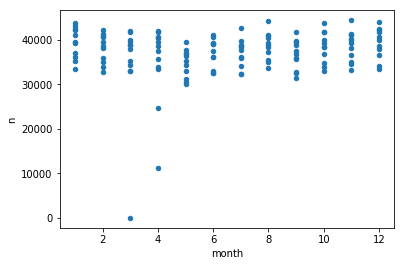

In [10]:
dfb.plot(x='month',y='n',kind="scatter")

In [11]:
# 3 outliers:
dfb.loc[dfb['n']<28000,['year','month','mc','n']]

,year,month,mc,n
0,1999.0,3,-100.0,6
1,1999.0,4,-99.0,24690
133,2010.0,4,33.0,11322


Think about outliers again....

In [12]:
# collecting mean values per month

month = {'month':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}
df_mean = pd.DataFrame(data=month)

df_mean['mean'] = np.nan

x=1
while x < 13:
    df_mean.loc[df_mean['month'] == x, 'mean'] = dfb.loc[(dfb['month']==x) & (dfb['year']>=2000) & \
                                                         (dfb['year']<=2009),'n'].mean()
    x += 1

df_mean

,month,mean
0,1,39091.7
1,2,37724.9
2,3,37263.4
3,4,38290.8
4,5,35146.9
5,6,37447.8
6,7,37429.5
7,8,39047.9
8,9,37088.8
9,10,38873.9


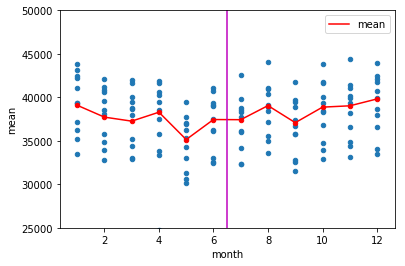

In [13]:
# Plotting scatter with mean

ax=dfb.plot(x='month',y='n',kind="scatter",ylim=(25000,50000))
ax1=df_mean.plot(x='month',y='mean',kind="line", color="r", ax=ax)
df_mean.plot(x='month',y='mean',kind="scatter", color="r", ax=ax1)
plt.axvline(x=6.5, color="m")
plt.show()

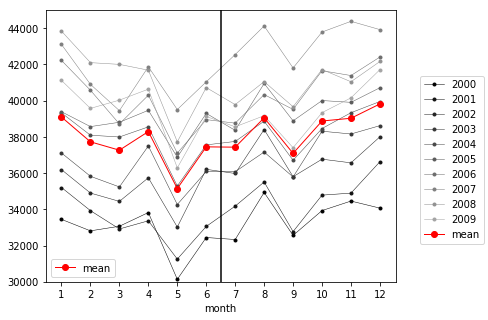

In [14]:
# Plotting years

fig, ax = plt.subplots()


x=0
while x<10 :
    y=x/14
    dfb.loc[dfb['year']==2000+x].plot(x='month',y='n',linestyle='-',linewidth=0.5, marker='.',ylim=(30000,45000), \
                                      ax=ax, label=2000+x, legend=None, color=str(y), figsize=(7,5))
    x+=1

df_mean.plot(x='month',y='mean',linestyle='-',linewidth=1, marker='o', color="r", ax=ax)
fig.legend(loc=7)
plt.axvline(x=6.5, color="black")
fig.subplots_adjust(right=0.82)
plt.xticks(np.arange(1,13, step=1))
plt.yticks(np.arange(30000,45000, step=2000))
plt.show()

Clearly, there is a seasonal pattern, e.g. a drop in May and Spetember as well as a peak in August. Note, that this seasonal pattern in the number of conceptions also partly reflects differences in the number of days per month.

Include also years 2007 and 2008-2010? Or Print 2007 in different color? Also, be aware, how mean is calculated...

In [15]:
dfb.head()

,mc,n,month,july,days,post,mc2,mc3,ln,jan,...,apr,mai,jun,jul,aug,sep,oct,nov,dec,year
0,-100.0,6,3,0,31,0,10000.0,-1000000.0,1.791759,0,...,0,0,0,0,0,0,0,0,0,1999.0
1,-99.0,24690,4,0,30,0,9801.0,-970299.0,10.114154,0,...,1,0,0,0,0,0,0,0,0,1999.0
2,-98.0,30595,5,0,31,0,9604.0,-941192.0,10.328592,0,...,0,1,0,0,0,0,0,0,0,1999.0
3,-97.0,32547,6,0,30,0,9409.0,-912673.0,10.390440,0,...,0,0,1,0,0,0,0,0,0,1999.0
4,-96.0,32352,7,1,31,0,9216.0,-884736.0,10.384431,0,...,0,0,0,1,0,0,0,0,0,1999.0


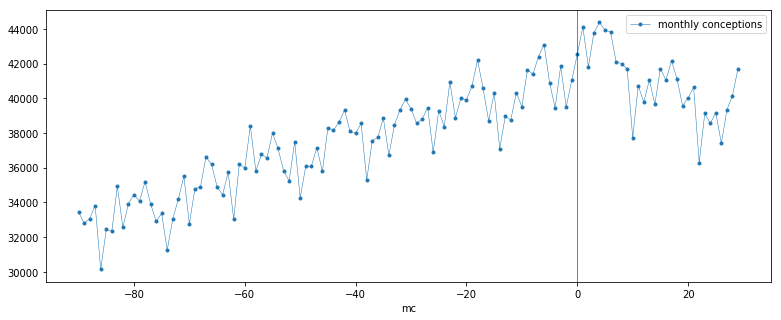

In [16]:
dfb.loc[(dfb['year']>=2000)&(dfb['year']<=2009)].plot(x='mc',y='n',linestyle='-',linewidth=0.5, marker='.',\
                                                      figsize=(13,5), label="monthly conceptions")
plt.axvline(x=0, color="black", linewidth=0.5)

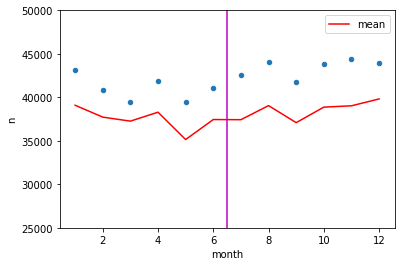

In [17]:
# Plotting 2007 vs. mean 

ax1=dfb.loc[dfb['year']==2007,['month','n']].plot(x='month',y='n',kind="scatter",ylim=(25000,50000))
df_mean.plot(x='month',y='mean',kind="line", color="r", ax=ax1)
plt.axvline(x=6.5, color="m")
plt.show()

#### Abortions:

Now, processing the second data set containing information about abortions.

First, the raw data:

In [18]:
pd.read_stata('data/data_abortions_20110196.dta').describe().round(2)

,year,month,n_ive_and,n_ive_val,n_ive_rioja,n_ive_cat,n_ive_can,n_ive_mad,n_ive_gal,n_ive_bal,n_ive_pv,n_ive_castlm,n_ive_ast,n_ive_arag
count,144.00,144.00,132.00,132.00,120.00,120.00,144.00,120.00,120.00,120.00,120.00,132.00,132.00,132.00
mean,2004.50,6.50,1304.08,769.14,40.45,1520.87,303.17,1415.85,215.08,212.16,190.10,251.08,177.80,286.87
std,3.46,3.46,350.94,173.65,9.08,372.71,84.05,326.50,29.13,33.21,48.82,23.85,25.58,44.14
min,1999.00,1.00,694.00,430.00,21.00,957.00,161.00,820.00,159.00,146.00,105.00,198.00,117.00,175.00
25%,2001.75,3.75,1006.50,634.75,34.00,1207.50,236.00,1192.00,196.00,189.00,147.00,234.75,158.00,265.75
50%,2004.50,6.50,1313.50,772.00,40.00,1411.00,269.50,1383.00,211.50,211.00,184.50,252.00,178.00,287.00
75%,2007.25,9.25,1580.50,898.25,46.25,1801.00,374.25,1647.50,228.00,235.25,236.25,264.25,196.00,317.00
max,2010.00,12.00,2021.00,1144.00,67.00,2442.00,483.00,2113.00,341.00,295.00,283.00,315.00,241.00,398.00


The variables starting with "n_ive_" are the number of abortions per month in different regions of Spain. For some regions we have observations for 1999-2009 and for others from 2000-2010.

The manipulations are comparable to those for the births data set and can be found in the auxiliary-file.

The following is part of the paper's Table 1 - Descriptive Statitics

In [19]:
dfa = process_abortions_data()
print('Table 2 - Descriptive Statistics - Abortions')
print(dfa[['n_tot','post','m']].describe().round(2))

Table 2 - Descriptive Statistics - Abortions
         n_tot    post       m
count   120.00  120.00  120.00
mean   6724.62    0.25  -30.50
std    1348.07    0.43   34.79
min    4512.00    0.00  -90.00
25%    5624.00    0.00  -60.25
50%    6535.50    0.00  -30.50
75%    7710.75    0.25   -0.75
max    9553.00    1.00   29.00


<a id='regression'></a>
### 4.1) Regression Results and Visualization
The specifications, the author uses, differ with respect to the number of months included in the dataset and with respect to the order of the month-polynomial.

The following tabale corresponds to Table 2 - Fertility Results (Conceptions and Abortions) (p. 170)

In [20]:
reg_list_b = reg_conception(dfb)
reg_list_a = reg_abortion(dfa)
table_reg_output(reg_list_b, reg_list_a)

Table 3 - Fertility Results (Conceptions and Abortions)
——————————————————————————————————————————————————————————————————————————————————————————————————————————————
                 RDD (1)     RDD (2)     RDD (3)     RDD (4)     RDD (5)     DID (6)     DID (7)     DID (8)
                10 years     5 years   12 months    9 months    3 months    10 years     7 years     5 years
——————————————————————————————————————————————————————————————————————————————————————————————————————————————
Conceptions       0.0531      0.0695      0.0852      0.0750      0.0503      0.0495      0.0539      0.0527                                                                                                              
                  0.0219      0.0250      0.0359      0.0285      0.0314      0.0103      0.0088      0.0136                                                                                                              
                  0.0156      0.0055      0.0177      0.0085      

For conceptions: We can observe small differences with respect to the 7 and 10 years specifications because because we take into account all leap years during those time periods while the author took only 2008 into account.

For abortions: LG accounted for all three leap years as well and, therefore, our results are identical to those in the paper.

#### Visualization of Regression Results
The following two plots show the data and the fitted regression line from the specification RDD(2). The range of mc is chosen according to Figure 1. Fertility Effect: Conceptions and Abortions by Month on page 171 of the article.

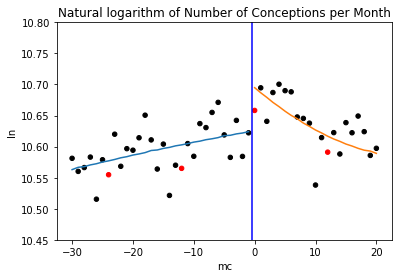

In [21]:
RDD_plot_conceptions(dfb, reg_list_b[1])

Visually, there might be an increase shortly after the inroduction of the policy. Especially if we compare the july-observations (shown in red). On the other hand, it could as well look like a continuation of the increasing time trend.

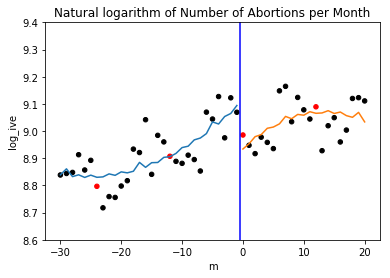

In [22]:
RDD_plot_abortions(dfa, reg_list_a[1])

#### Figures to compare with Figure 1. Fertility Effect (p. 171)

<img src="causal-graphs/Figure 1. Fertility Effect.png" width="400" />

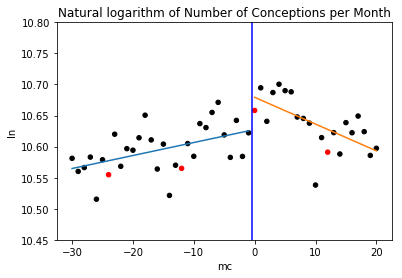

In [23]:
b_reg_for_plot = smf.ols(formula =
            'ln ~ post + mc + post*mc', data=dfb.loc[(dfb['mc']>-31) & (dfb['mc']<21)]).fit(cov_type='HC1')
RDD_plot_conceptions(dfb, b_reg_for_plot)

An important difference is that the plot in the paper uses bimonthly data, meaning that two months are summed up for the plot. Therefore, the jump at the cutoff looks much huger than it actually is.

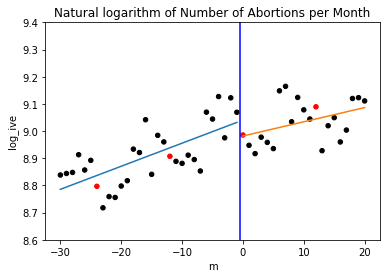

In [24]:
a_reg_for_plot = smf.ols(formula =
            'log_ive ~ post + m + post*m', data=dfa.loc[(dfa['m']>-31) & (dfa['m']<21)]).fit(cov_type='HC1')
RDD_plot_abortions(dfa, a_reg_for_plot)

#### Replication of the do-file "hbs"

In [25]:
df_hbs = read_and_manipulate_hbs()

In [26]:
print('\x1b[1m' 'Table 3: Descriptive Statistics - Household Budget Survey (2008)')
df_hbs.loc[(df_hbs['month']>-10) & (df_hbs['month']<9), ['gastmon', 'c_m_exp', 'dur_exp', \
            'm_exp12312', 'post', 'month', 'agemom', 'sec1mom', 'sec2mom', 'unimom','immig', \
            'sib']].describe().loc[['mean','std','min','50%']].round(3)

Table 3: Descriptive Statistics - Household Budget Survey (2008)


,gastmon,c_m_exp,dur_exp,m_exp12312,post,month,agemom,sec1mom,sec2mom,unimom,immig,sib
mean,30507.152,4778.250,5654.333,305.794,0.487,-0.780,32.521,0.234,0.326,0.320,0.165,0.539
std,17721.420,4274.954,8740.152,848.094,0.500,5.056,5.448,0.423,0.469,0.467,0.371,0.499
min,3784.887,0.000,0.000,0.000,0.000,-9.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,26144.552,3561.401,2276.193,0.000,0.000,-1.000,33.000,0.000,0.000,0.000,0.000,1.000


In [27]:
df_hbs = preparation_hbs()

C:\Users\Marc\Documents\GitHub\student-project-antonia-marc\auxiliary\auxiliary_m.py:93: RuntimeWarning: divide by zero encountered in log
  df_hbs.loc[df_hbs['c_m_exp']!=0, 'lcexp'] = np.log(df_hbs.c_m_exp)
C:\Users\Marc\Documents\GitHub\student-project-antonia-marc\auxiliary\auxiliary_m.py:95: RuntimeWarning: divide by zero encountered in log
  df_hbs.loc[df_hbs['dur_exp']!=0, 'ldurexp'] = np.log(df_hbs.dur_exp)


Household Expenditures

In [28]:
# time windows:
spec1 = df_hbs.loc[(df_hbs['month']>-10) & (df_hbs['month']<9)]
spec2 = df_hbs.loc[(df_hbs['month']>-7) & (df_hbs['month']<6)]
spec3 = df_hbs.loc[(df_hbs['month']>-5) & (df_hbs['month']<4)]
spec4 = df_hbs.loc[(df_hbs['month']>-4) & (df_hbs['month']<3)]
spec5_6 = df_hbs.loc[(df_hbs['month']>-3) & (df_hbs['month']<2)]
spec7 = df_hbs

# creating lists:
dep_vars = ["gastmon", "ltotexp", "c_m_exp", "lcexp", "dur_exp", "ldurexp"]
dep_vars_name = ["Tot. exp.", "ln[Tot. exp.]", "Child-rel. exp.", "ln[Child-rel. exp.]",\
                  "Dur. goods exp.", "ln[Dur. goods exp.]"]

#regressions:
reg_spec1 = []
for dep_var in dep_vars:
    formula = dep_var + "~ post + month + month2 + nomom + agemom + age2 + age3 + sec1mom + sec2mom + unimom + immig + sib + post_month + post_month2 + mes_enc_2 + mes_enc_3 + mes_enc_4 + mes_enc_5 + mes_enc_6  + mes_enc_7 + mes_enc_8 + mes_enc_9 + mes_enc_10 + mes_enc_11 +  mes_enc_12"
    reg_spec1.append(smf.ols(formula=formula, data = spec1).fit(cov_type='HC1'))

reg_spec2 = []
for dep_var in dep_vars:
    formula = dep_var + "~ post + month + nomom + agemom + age2 + age3 + sec1mom + sec2mom + unimom + immig + sib + post_month + mes_enc_2 + mes_enc_3 + mes_enc_4 + mes_enc_5 + mes_enc_6  + mes_enc_7 + mes_enc_8 + mes_enc_9 + mes_enc_10 + mes_enc_11 +  mes_enc_12"
    reg_spec2.append(smf.ols(formula=formula, data = spec2).fit(cov_type='HC1'))

reg_spec3 = []
for dep_var in dep_vars:
    formula = dep_var + "~ post + month + nomom + agemom + age2 + age3 + sec1mom + sec2mom + unimom + immig + sib + post_month + mes_enc_2 + mes_enc_3 + mes_enc_4 + mes_enc_5 + mes_enc_6  + mes_enc_7 + mes_enc_8 + mes_enc_9 + mes_enc_10 + mes_enc_11 +  mes_enc_12"
    reg_spec3.append(smf.ols(formula=formula, data = spec3).fit(cov_type='HC1'))

reg_spec4 = []
for dep_var in dep_vars:
    formula = dep_var + "~ post + nomom + agemom + age2 + age3 + sec1mom + sec2mom + unimom + immig + sib  + mes_enc_2 + mes_enc_3 + mes_enc_4 + mes_enc_5 + mes_enc_6  + mes_enc_7 + mes_enc_8 + mes_enc_9 + mes_enc_10 + mes_enc_11 +  mes_enc_12"
    reg_spec4.append(smf.ols(formula=formula, data = spec4).fit(cov_type='HC1'))

reg_spec5 = []
for dep_var in dep_vars:
    formula = dep_var + "~ post"
    reg_spec5.append(smf.ols(formula=formula, data = spec5_6).fit(cov_type='HC1'))

reg_spec6 = []
for dep_var in dep_vars:
    formula = dep_var + "~ post + nomom + agemom + age2 + age3 + sec1mom + sec2mom + unimom + immig + sib  + mes_enc_2 + mes_enc_3 + mes_enc_4 + mes_enc_5 + mes_enc_6  + mes_enc_7 + mes_enc_8 + mes_enc_9 + mes_enc_10 + mes_enc_11 +  mes_enc_12"
    reg_spec6.append(smf.ols(formula=formula, data = spec5_6).fit(cov_type='HC1'))
    
reg_spec7 = []
for dep_var in dep_vars:
    formula = dep_var + "~ post + month + month2 + nomom + agemom + age2 + age3 + sec1mom + sec2mom + unimom + immig + sib + post_month + post_month2 + mes_enc_2 + mes_enc_3 + mes_enc_4 + mes_enc_5 + mes_enc_6  + mes_enc_7 + mes_enc_8 + mes_enc_9 + mes_enc_10 + mes_enc_11 +  mes_enc_12 + n_month_2 + n_month_3 + n_month_4 + n_month_5 + n_month_6 + n_month_7 + n_month_8 + n_month_9 + n_month_10 + n_month_11 + n_month_12"
    reg_spec7.append(smf.ols(formula=formula, data = spec7).fit(cov_type='HC1'))

In [29]:
table_expenditures(dep_vars,dep_vars_name,reg_spec1,reg_spec2,reg_spec3,reg_spec4,reg_spec5,reg_spec6,reg_spec7)

———————————————————————————————————————————————————————————————————————————————————————————————————————
                        RDD 9m      RDD 6m      RDD 4m      RDD 3m      RDD 2m      RDD 2m       DiD 1
                           (1)         (2)         (3)         (4)         (5)         (6)         (7)
———————————————————————————————————————————————————————————————————————————————————————————————————————
Tot. exp.             -3175.158   -2247.452     404.622    -579.998   -1774.182   -1084.494   -1306.658
                       2838.302    2244.167    2885.447    1552.861    2032.318    1831.721    2193.823
                          0.263       0.317       0.888       0.709       0.383       0.554       0.551

ln[Tot. exp.]            -0.142      -0.105      -0.034      -0.041      -0.072      -0.060      -0.049
                          0.092       0.074       0.092       0.052       0.067       0.063       0.071
                          0.124       0.155       0.707       0.4

Childcare Expenditures

In [30]:
# creating lists:
dep_vars_childcare = ["m_exp12312", "daycare_bin"]
dep_vars_childcare_name = ["Priv. day care", "Priv. day care (binary)"]

#regressions:
reg_spec1_childcare = []
for dep_var in dep_vars_childcare:
    formula = dep_var + "~ post + month + month2 + nomom + agemom + age2 + age3 + sec1mom + sec2mom + unimom + immig + sib + post_month + post_month2 + mes_enc_2 + mes_enc_3 + mes_enc_4 + mes_enc_5 + mes_enc_6  + mes_enc_7 + mes_enc_8 + mes_enc_9 + mes_enc_10 + mes_enc_11 +  mes_enc_12"
    reg_spec1_childcare.append(smf.ols(formula=formula, data = spec1).fit(cov_type='HC1'))

reg_spec2_childcare = []
for dep_var in dep_vars_childcare:
    formula = dep_var + "~ post + month + nomom + agemom + age2 + age3 + sec1mom + sec2mom + unimom + immig + sib + post_month + mes_enc_2 + mes_enc_3 + mes_enc_4 + mes_enc_5 + mes_enc_6  + mes_enc_7 + mes_enc_8 + mes_enc_9 + mes_enc_10 + mes_enc_11 +  mes_enc_12"
    reg_spec2_childcare.append(smf.ols(formula=formula, data = spec2).fit(cov_type='HC1'))

reg_spec3_childcare = []
for dep_var in dep_vars_childcare:
    formula = dep_var + "~ post + month + nomom + agemom + age2 + age3 + sec1mom + sec2mom + unimom + immig + sib + post_month + mes_enc_2 + mes_enc_3 + mes_enc_4 + mes_enc_5 + mes_enc_6  + mes_enc_7 + mes_enc_8 + mes_enc_9 + mes_enc_10 + mes_enc_11 +  mes_enc_12"
    reg_spec3_childcare.append(smf.ols(formula=formula, data = spec3).fit(cov_type='HC1'))

reg_spec4_childcare = []
for dep_var in dep_vars_childcare:
    formula = dep_var + "~ post + nomom + agemom + age2 + age3 + sec1mom + sec2mom + unimom + immig + sib  + mes_enc_2 + mes_enc_3 + mes_enc_4 + mes_enc_5 + mes_enc_6  + mes_enc_7 + mes_enc_8 + mes_enc_9 + mes_enc_10 + mes_enc_11 +  mes_enc_12"
    reg_spec4_childcare.append(smf.ols(formula=formula, data = spec4).fit(cov_type='HC1'))

reg_spec5_childcare = []
for dep_var in dep_vars_childcare:
    formula = dep_var + "~ post"
    reg_spec5_childcare.append(smf.ols(formula=formula, data = spec5_6).fit(cov_type='HC1'))

reg_spec6_childcare = []
for dep_var in dep_vars_childcare:
    formula = dep_var + "~ post + nomom + agemom + age2 + age3 + sec1mom + sec2mom + unimom + immig + sib  + mes_enc_2 + mes_enc_3 + mes_enc_4 + mes_enc_5 + mes_enc_6  + mes_enc_7 + mes_enc_8 + mes_enc_9 + mes_enc_10 + mes_enc_11 +  mes_enc_12"
    reg_spec6_childcare.append(smf.ols(formula=formula, data = spec5_6).fit(cov_type='HC1'))
    

reg_spec7_childcare = []
for dep_var in dep_vars_childcare:
    formula = dep_var + "~ post + month + month2 + post_month + post_month2 + nomom + agemom + age2 + age3 + sec1mom + sec2mom + unimom + immig + sib  + mes_enc_2 + mes_enc_3 + mes_enc_4 + mes_enc_5 + mes_enc_6  + mes_enc_7 + mes_enc_8 + mes_enc_9 + mes_enc_10 + mes_enc_11 +  mes_enc_12 + n_month_2 + n_month_3 + n_month_4 + n_month_5 + n_month_6 + n_month_7 + n_month_8 + n_month_9 + n_month_10 + n_month_11 + n_month_12"
    reg_spec7_childcare.append(smf.ols(formula=formula, data = spec7).fit(cov_type='HC1'))


In [31]:
table_childcare(dep_vars_childcare,dep_vars_childcare_name,reg_spec1_childcare,reg_spec2_childcare,reg_spec3_childcare,reg_spec4_childcare,reg_spec5_childcare,reg_spec6_childcare,reg_spec7_childcare)

—————————————————————————————————————————————————————————————————————————————————————————————————————————————
                             RDD 9m      RDD 6m      RDD 4m      RDD 3m      RDD 2m      RDD 2m       DiD 1
                                (1)         (2)         (3)         (4)         (5)         (6)        (7)*
—————————————————————————————————————————————————————————————————————————————————————————————————————————————
Priv. day care              -137.915    -123.215    -195.384    -156.693    -147.121    -158.186    -107.566
                             169.540     121.075     160.720      80.009     101.274     103.271     125.126
                               0.416       0.309       0.224       0.050       0.146       0.126       0.390

Priv. day care (binary)       -0.080      -0.099      -0.104      -0.094      -0.110      -0.125       0.024
                               0.094       0.074       0.094       0.054       0.062       0.064       0.072
                  

In regression specification (7), the author forgot to specify an interaction term which allows the time trend to differ before and after the cut-off. For this reason, the results  in this column differ compared to those reported by the author: while the coefficient of private day care was significant at the 5 percent level, the coefficient is now far from being significant.

#### Replication of the do-file "lfs"

In [32]:
df_lfs = read_and_manipulate_lfs()

In [33]:
print('\x1b[1m' 'Table 4: Descriptive Statistics - Labor force survey (2008)')
df_lfs.loc[(df_lfs['m']>-10) & (df_lfs['m']<9), ['work', 'work2', 'post', 'm', 'age', \
       'primary', 'hsgrad', 'univ', 'immig', 'sib']].describe().loc[['mean','std','50%']].round(3)

Table 4: Descriptive Statistics - Labor force survey (2008)


,work,work2,post,m,age,primary,hsgrad,univ,immig,sib
mean,0.422,0.541,0.477,-0.815,32.376,0.236,0.343,0.297,0.170,0.523
std,0.494,0.498,0.499,5.128,5.252,0.425,0.475,0.457,0.376,0.500
50%,0.000,1.000,0.000,-1.000,33.000,0.000,0.000,0.000,0.000,1.000


In [34]:
df_lfs = preparation_lfs()

(Only for year 2008, since the data set for 2009 has not been provided)

In [35]:
# time windows:
spec1 = df_lfs.loc[(df_lfs['m']>-10) & (df_lfs['m']<9)]
spec2 = df_lfs.loc[(df_lfs['m']>-7) & (df_lfs['m']<6)]
spec3 = df_lfs.loc[(df_lfs['m']>-5) & (df_lfs['m']<4)]
spec4 = df_lfs.loc[(df_lfs['m']>-4) & (df_lfs['m']<3)]
spec5_6 = df_lfs.loc[(df_lfs['m']>-3) & (df_lfs['m']<2)]
spec7 = df_lfs

#creating lists:
dep_vars_LS = ["work", "work2"]
dep_vars_LS_name = ["Working last week", "Employed"]


# regressions:
reg_spec1_LS = []
for dep_var in dep_vars_LS:
    formula = dep_var + "~ post + m + post_m + m2 + post_m2 + age + age2 + age3 + immig + primary + hsgrad + univ + sib + pleave + q_2 + q_3 + q_4"
    reg_spec1_LS.append(smf.ols(formula=formula, data = spec1).fit(cov_type='HC1'))

reg_spec2_LS = []
for dep_var in dep_vars_LS:
    formula = dep_var + "~ post + m + post_m +  age + age2 + age3 + immig + primary + hsgrad + univ + sib + pleave + q_2 + q_3 + q_4"
    reg_spec2_LS.append(smf.ols(formula=formula, data = spec2).fit(cov_type='HC1'))

reg_spec3_LS = []
for dep_var in dep_vars_LS:
    formula = dep_var + "~ post + m + post_m +  age + age2 + age3 + immig + primary + hsgrad + univ + sib + pleave + q_2 + q_3 + q_4"
    reg_spec3_LS.append(smf.ols(formula=formula, data = spec3).fit(cov_type='HC1'))

reg_spec4_LS = []
for dep_var in dep_vars_LS:
    formula = dep_var + "~ post + age + age2 + age3 + immig + primary + hsgrad + univ + sib + pleave + q_2 + q_3 + q_4"
    reg_spec4_LS.append(smf.ols(formula=formula, data = spec4).fit(cov_type='HC1'))

reg_spec5_LS = []
for dep_var in dep_vars_LS:
    formula = dep_var + "~ post "
    reg_spec5_LS.append(smf.ols(formula=formula, data = spec5_6).fit(cov_type='HC1'))

reg_spec6_LS = []
for dep_var in dep_vars_LS:
    formula = dep_var + "~ post + age + age2 + age3 + immig + primary + hsgrad + univ + sib + q_2 + q_3 + q_4"
    reg_spec6_LS.append(smf.ols(formula=formula, data = spec5_6).fit(cov_type='HC1'))

reg_spec7_LS = []
for dep_var in dep_vars_LS:
    formula = dep_var + "~ post + m + m2 + age + age2 + age3 + immig + primary + hsgrad + univ + sib + pleave + q_2 + q_3 + q_4 + n_month_2 + n_month_3 + n_month_4 + n_month_5 + n_month_6 + n_month_7 + n_month_8 + n_month_9 + n_month_10 + n_month_11 + n_month_12"
    reg_spec7_LS.append(smf.ols(formula=formula, data = spec7).fit(cov_type='cluster', cov_kwds={'groups': df_lfs['m']}))

reg_spec8_LS = []
for dep_var in dep_vars_LS:
    formula = dep_var + "~ post + m + post_m + m2 + post_m2 + age + age2 + age3 + immig + primary + hsgrad + univ + sib + pleave + q_2 + q_3 + q_4 + n_month_2 + n_month_3 + n_month_4 + n_month_5 + n_month_6 + n_month_7 + n_month_8 + n_month_9 + n_month_10 + n_month_11 + n_month_12"
    reg_spec8_LS.append(smf.ols(formula=formula, data = spec7).fit(cov_type='cluster', cov_kwds={'groups': df_lfs['m']}))

In [36]:
table_LS(dep_vars_LS, dep_vars_LS_name, reg_spec1_LS, reg_spec2_LS, reg_spec3_LS, reg_spec4_LS, reg_spec5_LS, reg_spec6_LS, reg_spec7_LS, reg_spec8_LS)

————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
                         RDD 9m      RDD 6m      RDD 4m      RDD 3m      RDD 2m      RDD 2m       DiD 1      DID 1*
                            (1)         (2)         (3)         (4)         (5)         (6)         (7)         (8)
————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
Working last week         -0.064      -0.043      -0.058      -0.053      -0.055      -0.058      -0.044      -0.021
                           0.032       0.025       0.031       0.018       0.022       0.021       0.015       0.018
                           0.044       0.084       0.064       0.003       0.013       0.007       0.004       0.249

Employed                  -0.063      -0.039      -0.080      -0.053      -0.061      -0.061      -0.020       0.005
                           0.031       0.024       0.030       0.

#### Autocorrelation Plots

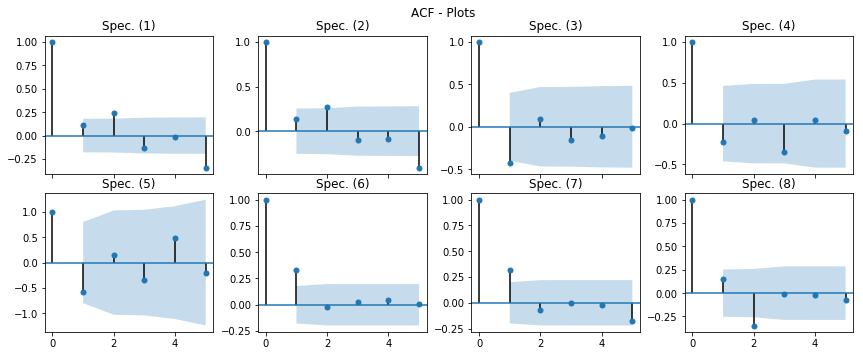

In [37]:
fig, axes = plt.subplots(ncols=4, nrows=2, sharex=True, figsize=(12,5))


plt.tight_layout()
fig.suptitle('ACF - Plots')
plt.subplots_adjust(top=0.9)

for x in range(4):
    smt.graphics.plot_acf(reg_list_b[x].resid,lags=5,alpha=0.05, ax=axes[0,x])
    axes[0,x].set_title('Spec. ('+str(x+1)+')')
    smt.graphics.plot_acf(reg_list_b[x+4].resid,lags=5,alpha=0.05, ax=axes[1,x])
    axes[1,x].set_title('Spec. ('+str(x+5)+')')



Accounting for Autocorrelation appears to be necessary at least in some specifications...

<a id='critique'></a>
## 4.) Critical Assesment of the Author's Empirical Work

<a id='mc_revised'></a>
### 4.2) Computing Month of Conception More Precisely

The author used the variables semanas to compute month of conception (mc). However, for some reason she did not extract the full information from this variable: If a woman stated that pregnancy lasted less than 39 weeks the author subtracted only 8 months from the variable month of birth. However, for a duration of less than 35 weeks the author did not subtract only 7 months but 8 months as well.

Because the variable month of conception is the running variable and, therefore, the most important explaining variable of the analysis, we want to compute it as precisely as possible and check whether our results will be different than the author's results.

In [38]:
dfb_mc_new = mc_more_precisely()
reg_list_b_mc_new = reg_conception(dfb_mc_new)
table_reg_output_2(reg_list_b_mc_new, reg_list_b)

——————————————————————————————————————————————————————————————————————————————————————————————————————————————
                 RDD (1)     RDD (2)     RDD (3)     RDD (4)     RDD (5)     DID (6)     DID (7)     DID (8)
                10 years     5 years   12 months    9 months    3 months    10 years     7 years     5 years
——————————————————————————————————————————————————————————————————————————————————————————————————————————————
mc revised        0.0525      0.0686      0.0843      0.0730      0.0495      0.0501      0.0544      0.0540                                                                                                              
                  0.0218      0.0252      0.0369      0.0290      0.0321      0.0104      0.0087      0.0136                                                                                                              
                  0.0158      0.0065      0.0225      0.0119      0.1227      0.0000      0.0000      0.0001              

The coefficient estimates using mc revised differ only slightly from our previous esimates. The significance levels at which one would reject the hypothesis that the policy had no effect on conceptions stay the same except for RDD (4). In RDD (4), with mc revised as dependent variable, the treatment dummy is significant at the 5 % level and not at the 1 % level anymore.

<a id='further_analyses'></a>
## 5.) Further Analyses

<a id='abolishment'></a>
### 5.1) Abolishment of the Policy

In [39]:
df_births = create_births()

In [40]:
df_births.describe()

,mesp,year,prem,semanas
count,7.979638e+06,7.979638e+06,7.979638e+06,7.245241e+06
mean,6.567206e+00,2.008489e+03,1.071309e+00,3.653140e+01
std,3.438349e+00,5.017516e+00,2.573403e-01,9.724730e+00
min,1.000000e+00,2.000000e+03,1.000000e+00,0.000000e+00
25%,4.000000e+00,2.004000e+03,1.000000e+00,3.800000e+01
50%,7.000000e+00,2.008000e+03,1.000000e+00,3.900000e+01
75%,1.000000e+01,2.013000e+03,1.000000e+00,4.000000e+01
max,1.200000e+01,2.017000e+03,2.000000e+00,4.600000e+01


In [41]:
df_abolishment = preparation_abolishment(df_births)

In [42]:
# create necessary subsets of df_abolishment
df_abolishment_list = list()

df_abolishment_list.append(df_abolishment.loc[(df_abolishment['mc']>-31) & (df_abolishment['mc']<30)]) # 5 years
df_abolishment_list.append(df_abolishment.loc[(df_abolishment['mc']>-13) & (df_abolishment['mc']<12)]) # 12 months
df_abolishment_list.append(df_abolishment.loc[(df_abolishment['mc']>-10) & (df_abolishment['mc']<9)]) # 9 months
df_abolishment_list.append(df_abolishment.loc[(df_abolishment['mc']>-4) & (df_abolishment['mc']<3)]) # 3 months

# run regressions
reg1 = smf.ols(formula =
        'ln ~ post + mc + post*mc + mc2 + post*mc2 + days', data=df_abolishment_list[0]).fit(cov_type='HC1')
reg2 = smf.ols(formula =
        'ln ~ post + mc + post*mc + mc2 + post*mc2 + days', data=df_abolishment_list[1]).fit(cov_type='HC1')
reg3 = smf.ols(formula =
        'ln ~ post + mc + post*mc + days', data=df_abolishment_list[2]).fit(cov_type='HC1')
reg4 = smf.ols(formula =
        'ln ~ post + days', data=df_abolishment_list[3]).fit(cov_type='HC1')
reg5 = smf.ols(formula =
        'ln ~ post + mc + post*mc + mc2 + post*mc2 + days + feb + mar + apr + mai + jun + jul + aug + sep + oct + nov + dec', data=df_abolishment_list[0]).fit(cov_type='HC1')

# store regessions in list
reg_list_abolishment = [reg1, reg2, reg3, reg4, reg5]

In [43]:
table_abolishment(reg_list_abolishment)

————————————————————————————————————————————————————————————————————————
                 RDD (1)     RDD (2)     RDD (3)     RDD (4)     DID (5)
                 5 years   12 months    9 months    3 months     5 years
————————————————————————————————————————————————————————————————————————
Conceptions      -0.0961     -0.1052     -0.1266     -0.0756     -0.0397                                                                        
                  0.0263      0.0417      0.0388      0.0375      0.0166                                                                        
                  0.0003      0.0117      0.0011      0.0441      0.0167                                                                        
————————————————————————————————————————————————————————————————————————
Notes: The dependent variable is the natural logarithm of the monthly number of conceptions.
For each of the specifications, the coefficient, standard error and p-value of the binary treatment indicat

## Placebo Tests

### Cutoff-Month: 07/2016

In [48]:
df_births3 = pd.read_stata('data/data_births_20110196.dta')
df_births3.head()

df_births3.year = df_births3.year.astype(int)
df_births3.mesp = df_births3.mesp.astype(int)
df_births3.prem = df_births3.prem.astype(int)

# append data frame 
    
years = ["2011", "2012", "2013", "2014", "2015", "2016", "2017"]

list_2011_2017 = []
for year in years:
    path = "data/partos_"+year+".csv"
    df = pd.read_csv(path, sep = ';')
    list_2011_2017.append(df)
         
x = 0
while x < 7:
    list_2011_2017[x].year = list_2011_2017[x].year.astype(int)
    list_2011_2017[x].mesp = list_2011_2017[x].mesp.astype(int)
    list_2011_2017[x].prem = list_2011_2017[x].prem.astype(int)
    df_births3 = df_births3.append(list_2011_2017[x], ignore_index = True)
    x += 1
        
df_births3.describe()


,mesp,year,prem,semanas
count,7.979638e+06,7.979638e+06,7.979638e+06,7.245241e+06
mean,6.567206e+00,2.008489e+03,1.071309e+00,3.653140e+01
std,3.438349e+00,5.017516e+00,2.573403e-01,9.724730e+00
min,1.000000e+00,2.000000e+03,1.000000e+00,0.000000e+00
25%,4.000000e+00,2.004000e+03,1.000000e+00,3.800000e+01
50%,7.000000e+00,2.008000e+03,1.000000e+00,3.900000e+01
75%,1.000000e+01,2.013000e+03,1.000000e+00,4.000000e+01
max,1.200000e+01,2.017000e+03,2.000000e+00,4.600000e+01


In [49]:
# Create month of birth variable
df_births3['m'] = np.nan

x = 0
while x < 18:
    df_births3.loc[df_births3['year'] == 2017 - x, 'm'] = df_births3['mesp'] + 5 - (x*12)
    x += 1
    
df_births3.loc[df_births3['year']==2016, ['year', 'mesp', 'm']]

####
# Create month of conception (sophisticated version)

df_births3['mc'] = np.where((df_births3['prem'] == 2) |
        # if premature baby subtract only 8 months to get month of conception
        ((0 < df_births3['semanas']) & (df_births3['semanas'] < 39)), df_births3['m'] - 8,
        # otherwise if baby was born only after 43 months --> -10
        np.where(df_births3['semanas'] > 43, df_births3['m'] - 10,
        # otherwise  - 9
        df_births3['m'] - 9))

df_births3['n'] = 1
dfp = df_births3.groupby('mc', as_index = False)['n'].count()

In [50]:
####
# Create calender month of conception:

dfp['month'] = 0

for i in range(3):
    dfp.loc[dfp['mc'] == 0 + 12*i, 'month'] = 7
    dfp.loc[dfp['mc'] == 1 + 12*i, 'month'] = 8
    dfp.loc[dfp['mc'] == 2 + 12*i, 'month'] = 9
    dfp.loc[dfp['mc'] == 3 + 12*i, 'month'] = 10
    dfp.loc[dfp['mc'] == 4 + 12*i, 'month'] = 11
    dfp.loc[dfp['mc'] == 5 + 12*i, 'month'] = 12
    dfp.loc[dfp['mc'] == 6 + 12*i, 'month'] = 1
    dfp.loc[dfp['mc'] == 7 + 12*i, 'month'] = 2
    dfp.loc[dfp['mc'] == 8 + 12*i, 'month'] = 3
    dfp.loc[dfp['mc'] == 9 + 12*i, 'month'] = 4
    dfp.loc[dfp['mc'] == 10 + 12*i, 'month'] = 5
    dfp.loc[dfp['mc'] == 11 + 12*i, 'month'] = 6
       
for i in range(18):
    dfp.loc[dfp['mc'] == -1 - 12*i, 'month'] = 6
    dfp.loc[dfp['mc'] == -2 - 12*i, 'month'] = 5
    dfp.loc[dfp['mc'] == -3 - 12*i, 'month'] = 4
    dfp.loc[dfp['mc'] == -4 - 12*i, 'month'] = 3
    dfp.loc[dfp['mc'] == -5 - 12*i, 'month'] = 2
    dfp.loc[dfp['mc'] == -6 - 12*i, 'month'] = 1
    dfp.loc[dfp['mc'] == -7 - 12*i, 'month'] = 12
    dfp.loc[dfp['mc'] == -8 - 12*i, 'month'] = 11
    dfp.loc[dfp['mc'] == -9 - 12*i, 'month'] = 10
    dfp.loc[dfp['mc'] == -10 - 12*i, 'month'] = 9
    dfp.loc[dfp['mc'] == -11 - 12*i, 'month'] = 8
    dfp.loc[dfp['mc'] == -12 - 12*i, 'month'] = 7

sum(dfp['month'] == 0)

# generate July indicator
dfp['july'] = np.where(dfp['month'] == 7, 1, 0)



# number of days in a month
dfp['days'] = np.where((dfp['mc'] == -5) | (dfp['mc'] == -53) |
        (dfp['mc'] == -101) | (dfp['mc'] == -149) | (dfp['mc'] == -197), 29,
        # for all other feburarys
        np.where(dfp['month'] == 2, 28,
        # for April, June, September, November
        np.where((dfp['month'] == 4) | (dfp['month'] == 6) |
                (dfp['month'] == 9) | (dfp['month'] == 11), 30, 31)))


# indicator for treatment group (post-policy conception), i.e. after June 2007
dfp['post'] = np.where(dfp['mc'] >= 0, 1, 0)

# quadratic and cubic mc:
dfp['mc2'] = dfp['mc']*dfp['mc']
dfp['mc3'] = dfp['mc']*dfp['mc']*dfp['mc']

dfp[['mc','mc2','mc3']].head()

# natural log of number of obs n
dfp['ln'] = np.log(dfp['n'])


In [51]:
# create necessary subsets of dfp
dfp_list = list()

dfp_list.append(dfp.loc[(dfp['mc']>-10) & (dfp['mc']<9)]) # 9 months
dfp_list.append(dfp.loc[(dfp['mc']>-4) & (dfp['mc']<3)]) # 3 months

reg1 = smf.ols(formula =
        'ln ~ post + mc + post*mc + days', data=dfp_list[0]).fit(cov_type='HC1')
reg2 = smf.ols(formula =
        'ln ~ post + days', data=dfp_list[1]).fit(cov_type='HC1')


# store regessions in list
reg_list_p = [reg1, reg2]

# Make a table equivalent to Table 2 with coefficients and se for post variable
print('\u2014'*40)
print('{:<12s}{:>12s}{:>12s}'
      .format("", "RDD (1)", "RDD (2)"))
print('{:<12s}{:>12s}{:>12s}'
      .format("", "9 months", "3 months"))
print('\u2014'*40)
print('{:<12s}'.format("Conceptions"), end="")
for i in range(len(reg_list_p)):
    print ('{:>12.4f}'.format(reg_list_p[i].params.post), end="")
print(" "*40)
print('{:<12s}'.format(""), end="")
for j in range(len(reg_list_p)):
    print ('{:>12.4f}'.format(reg_list_p[j].bse.post), end="")
print(" "*40)
print('{:<12s}'.format(""), end="")
for j in range(len(reg_list_p)):
    print ('\x1b[1m' '{:>12.4f}' '\x1b[0m'.format(reg_list_p[j].pvalues.post), end="")
    


————————————————————————————————————————
                 RDD (1)     RDD (2)
                9 months    3 months
————————————————————————————————————————
Conceptions       0.0480      0.0085                                        
                  0.0339      0.0234                                        
                  0.1567      0.7152

Placebo test with respect to the cut-off month 07/2016 does not display a significant effect in the both feasible specifications. This supports the identification strategy.

### Cut-off Month: 05/2016

In [52]:


df_births4 = pd.read_stata('data/data_births_20110196.dta')
df_births4.head()

df_births4.year = df_births4.year.astype(int)
df_births4.mesp = df_births4.mesp.astype(int)
df_births4.prem = df_births4.prem.astype(int)

# append data frame 
    
years = ["2011", "2012", "2013", "2014", "2015", "2016", "2017"]

list_2011_2017 = []
for year in years:
    path = "data/partos_"+year+".csv"
    df = pd.read_csv(path, sep = ';')
    list_2011_2017.append(df)
         
x = 0
while x < 7:
    list_2011_2017[x].year = list_2011_2017[x].year.astype(int)
    list_2011_2017[x].mesp = list_2011_2017[x].mesp.astype(int)
    list_2011_2017[x].prem = list_2011_2017[x].prem.astype(int)
    df_births4 = df_births4.append(list_2011_2017[x], ignore_index = True)
    x += 1
        
df_births4.describe()

,mesp,year,prem,semanas
count,7.979638e+06,7.979638e+06,7.979638e+06,7.245241e+06
mean,6.567206e+00,2.008489e+03,1.071309e+00,3.653140e+01
std,3.438349e+00,5.017516e+00,2.573403e-01,9.724730e+00
min,1.000000e+00,2.000000e+03,1.000000e+00,0.000000e+00
25%,4.000000e+00,2.004000e+03,1.000000e+00,3.800000e+01
50%,7.000000e+00,2.008000e+03,1.000000e+00,3.900000e+01
75%,1.000000e+01,2.013000e+03,1.000000e+00,4.000000e+01
max,1.200000e+01,2.017000e+03,2.000000e+00,4.600000e+01


In [53]:
# Create month of birth variable
df_births4['m'] = np.nan

x = 0
while x < 18:
    df_births4.loc[df_births4['year'] == 2017 - x, 'm'] = df_births4['mesp'] + 7 - (x*12)
    x += 1
    
df_births4.loc[df_births4['year']==2016, ['year', 'mesp', 'm']]

####
# Create month of conception (sophisticated version)

df_births4['mc'] = np.where((df_births4['prem'] == 2) |
        # if premature baby subtract only 8 months to get month of conception
        ((0 < df_births4['semanas']) & (df_births4['semanas'] < 39)), df_births4['m'] - 8,
        # otherwise if baby was born only after 43 months --> -10
        np.where(df_births4['semanas'] > 43, df_births4['m'] - 10,
        # otherwise  - 9
        df_births4['m'] - 9))

df_births4['n'] = 1
dfp2 = df_births4.groupby('mc', as_index = False)['n'].count()


In [54]:
####
# Create calender month of conception:

dfp2['month'] = 0

for i in range(3):
    dfp2.loc[dfp2['mc'] == 0 + 12*i, 'month'] = 5
    dfp2.loc[dfp2['mc'] == 1 + 12*i, 'month'] = 6
    dfp2.loc[dfp2['mc'] == 2 + 12*i, 'month'] = 7
    dfp2.loc[dfp2['mc'] == 3 + 12*i, 'month'] = 8
    dfp2.loc[dfp2['mc'] == 4 + 12*i, 'month'] = 9
    dfp2.loc[dfp2['mc'] == 5 + 12*i, 'month'] = 10
    dfp2.loc[dfp2['mc'] == 6 + 12*i, 'month'] = 11
    dfp2.loc[dfp2['mc'] == 7 + 12*i, 'month'] = 12
    dfp2.loc[dfp2['mc'] == 8 + 12*i, 'month'] = 1
    dfp2.loc[dfp2['mc'] == 9 + 12*i, 'month'] = 2
    dfp2.loc[dfp2['mc'] == 10 + 12*i, 'month'] = 3
    dfp2.loc[dfp2['mc'] == 11 + 12*i, 'month'] = 4
       
for i in range(18):
    dfp2.loc[dfp2['mc'] == -1 - 12*i, 'month'] = 4
    dfp2.loc[dfp2['mc'] == -2 - 12*i, 'month'] = 3
    dfp2.loc[dfp2['mc'] == -3 - 12*i, 'month'] = 2
    dfp2.loc[dfp2['mc'] == -4 - 12*i, 'month'] = 1
    dfp2.loc[dfp2['mc'] == -5 - 12*i, 'month'] = 12
    dfp2.loc[dfp2['mc'] == -6 - 12*i, 'month'] = 11
    dfp2.loc[dfp2['mc'] == -7 - 12*i, 'month'] = 10
    dfp2.loc[dfp2['mc'] == -8 - 12*i, 'month'] = 9
    dfp2.loc[dfp2['mc'] == -9 - 12*i, 'month'] = 8
    dfp2.loc[dfp2['mc'] == -10 - 12*i, 'month'] = 7
    dfp2.loc[dfp2['mc'] == -11 - 12*i, 'month'] = 6
    dfp2.loc[dfp2['mc'] == -12 - 12*i, 'month'] = 5

sum(dfp2['month'] == 0)

# generate May indicator
dfp2['may'] = np.where(dfp2['month'] == 5, 1, 0)



# number of days in a month
dfp2['days'] = np.where((dfp2['mc'] == -3) | (dfp2['mc'] == -51) |
        (dfp2['mc'] == -99) | (dfp2['mc'] == -147) | (dfp2['mc'] == -195), 29,
        # for all other feburarys
        np.where(dfp2['month'] == 2, 28,
        # for April, June, September, November
        np.where((dfp2['month'] == 4) | (dfp2['month'] == 6) |
                (dfp2['month'] == 9) | (dfp2['month'] == 11), 30, 31)))


# indicator for treatment group (post-policy conception), i.e. after June 2007
dfp2['post'] = np.where(dfp2['mc'] >= 0, 1, 0)

# quadratic and cubic mc:
dfp2['mc2'] = dfp2['mc']*dfp2['mc']
dfp2['mc3'] = dfp2['mc']*dfp2['mc']*dfp2['mc']

dfp2[['mc','mc2','mc3']].head()

# natural log of number of obs n
dfp2['ln'] = np.log(dfp2['n'])


# create necessary subsets of dfp2
dfp2_list = list()

dfp2_list.append(dfp2.loc[(dfp2['mc']>-10) & (dfp2['mc']<9)]) # 9 months
dfp2_list.append(dfp2.loc[(dfp2['mc']>-4) & (dfp2['mc']<3)]) # 3 months

reg1 = smf.ols(formula =
        'ln ~ post + mc + post*mc + days', data=dfp2_list[0]).fit(cov_type='HC1')
reg2 = smf.ols(formula =
        'ln ~ post + days', data=dfp2_list[1]).fit(cov_type='HC1')


# store regessions in list
reg_list_p2 = [reg1, reg2]

# Make a table equivalent to Table 2 with coefficients and se for post variable
print('\u2014'*40)
print('{:<12s}{:>12s}{:>12s}'
      .format("", "RDD (1)", "RDD (2)"))
print('{:<12s}{:>12s}{:>12s}'
      .format("", "9 months", "3 months"))
print('\u2014'*40)
print('{:<12s}'.format("Conceptions"), end="")
for i in range(len(reg_list_p2)):
    print ('{:>12.4f}'.format(reg_list_p2[i].params.post), end="")
print(" "*40)
print('{:<12s}'.format(""), end="")
for j in range(len(reg_list_p2)):
    print ('{:>12.4f}'.format(reg_list_p2[j].bse.post), end="")
print(" "*40)
print('{:<12s}'.format(""), end="")
for j in range(len(reg_list_p2)):
    print ('\x1b[1m' '{:>12.4f}' '\x1b[0m'.format(reg_list_p2[j].pvalues.post), end="")


————————————————————————————————————————
                 RDD (1)     RDD (2)
                9 months    3 months
————————————————————————————————————————
Conceptions      -0.0987     -0.0445                                        
                  0.0373      0.0160                                        
                  0.0081      0.0055

The placebo test with respect to the cut-off month 05/2016 suggests a significant decrease in conceptions. This is probably driven by seasonality and casts doubts on the general identification streategy using RDD. However, since applying a Diff-in-Diff is not feasible in this context, it remains unclear whether such an approach would be able to appropriately account for seasonality. In any case, the placebo test suggests a cautious interpretation of the above described findings regarding the abolishment of the policy.

<a id='conclusion'></a>
## 6.) Conclusion

<a id='references'></a>
## References


Frölich, M., & Sperlich, S. (2019). Impact evaluation. Cambridge University Press.

González, L. (2013). The effect of a universal child benefit on conceptions, abortions, and early maternal labor supply. American Economic Journal: Economic Policy, 5(3), 160-88.

Hahn, J., Todd, P., & Van der Klaauw, W. (2001). Identification and estimation of treatment effects with a regression‐discontinuity design. Econometrica, 69(1), 201-209.

Hausman, C., & Rapson, D. S. (2018). Regression discontinuity in time: Considerations for empirical applications. Annual Review of Resource Economics, 10, 533-552.

Lee, D. S., & Lemieux, T. (2010). Regression discontinuity designs in economics. Journal of economic literature, 48(2), 281-355.

Morgan, S. L., & Winship, C. (2015). Counterfactuals and causal inference. Cambridge University Press.

Newey, W. K., & West, K. D. (1987). A Simple, Positive Semi-Definite, Heteroskedasticity and Autocorrelation Consistent Covariance Matrix. Econometrica: Journal of the Econometric Society, 703-708.

Rubin, D. B. (1974). Estimating causal effects of treatments in randomized and nonrandomized studies. Journal of educational Psychology, 66(5), 688.

Thistlethwaite, D. L., & Campbell, D. T. (1960). Regression-discontinuity analysis: An alternative to the ex post facto experiment. Journal of Educational psychology, 51(6), 309.


<a id='appendix'></a>
## Appendix